#### Building a deck.

Which is a set of files in "card_deck_1" folder. This will only be used for visualization here.

In [2]:
from PIL import Image, ImageDraw, ImageFont
import os, sys
""" This script creates a standard playing deck of cards(52).
Tested on windows and linux - OS users will have to modify the
font type and font location.
Usage: python3 script_name.py"""
 
def build_deck(value,suit,polygon):
    if suit == 'hearts':
        fill_color= 'red'
    elif suit == 'diamonds':
        fill_color= 'red'
    else:
        fill_color= 'black'
    im = Image.new("RGB", (360, 430),'lightgray')
    draw = ImageDraw.Draw(im)
            
    draw.text((10, 10), text=value, fill=fill_color,
              font= font, stroke_width=2,
              stroke_fill="#0f0")
    if value == '10':
        draw.text((220,300),text=value,fill= fill_color, font=font,
                  stroke_width=2,stroke_fill='#0f0')
    else:
        draw.text((275,300),text=value,fill= fill_color, font=font,
                  stroke_width=2,stroke_fill='#0f0')
    draw.polygon(polygon, fill= fill_color,outline='yellow')
    path= f'{suit}_{value}.png'
    total_path= os.path.join(create_dir,path)
    im.save(total_path,'png')

def main():
    baseCards= ['A','2','3','4','5','6','7','8','9',
                         '10','J','Q','K',]
    diamonds= [(174.5, 281.5), (105.5, 197.5), (178.5, 125.5),
               (243.5, 195.5)]
    hearts= [(176.5, 155.5), (190.5, 136.5), (212.5, 119.5),
             (243.5, 116.5), (267.5, 135.5), (261.5, 170.5),
             (247.5, 198.5), (218.5, 228.5), (201.5, 250.5),
             (190.5, 269.5), (172.5, 256.5), (146.5, 234.5),
             (122.5, 202.5), (107.5, 180.5), (99.5, 150.5),
             (107.5, 122.5), (126.5, 108.5), (147.5, 111.5),
             (165.5, 134.5)]
    spades= [(175.5, 134.5), (159.5, 157.5), (141.5, 186.5),
             (129.5, 226.5), (137.5, 249.5), (165.5, 256.5),
             (185.5, 250.5), (190.5, 283.5), (206.5, 283.5),
             (203.5, 253.5), (217.5, 258.5), (240.5, 259.5),
             (256.5, 244.5), (256.5, 215.5), (235.5, 180.5),
             (206.5, 151.5), (186.5, 123.5)]
    clubs= [(158.5, 120.5), (175.5, 120.5), (196.5, 132.5),
            (202.5, 149.5), (201.5, 173.5), (191.5, 186.5),
            (211.5, 178.5), (230.5, 170.5), (252.5, 183.5),
            (253.5, 205.5), (237.5, 228.5), (219.5, 241.5),
            (195.5, 243.5), (181.5, 228.5), (185.5, 271.5),
            (169.5, 270.5), (171.5, 233.5), (158.5, 240.5),
            (140.5, 248.5), (106.5, 232.5), (98.5, 207.5),
            (108.5, 182.5), (136.5, 176.5), (131.5, 165.5),
            (120.5, 137.5), (137.5, 122.5)]    
     
    suits= {'diamonds':diamonds,'hearts':hearts,
            'spades':spades,'clubs':clubs}    
    for key,value in suits.items():        
        for card in baseCards:                       
            build_deck(card, key ,value)
    print('your deck is complete!')

if __name__ == '__main__':
    create_dir= 'card_deck_1'
    os.makedirs(create_dir, exist_ok=True)
    if sys.platform == 'linux':
        font = ImageFont.truetype("Tests/fonts/FreeMono.ttf", 120)
    elif sys.platform == 'win32':
        font= ImageFont.truetype('arial.ttf', 120)
    elif sys.platform == 'darwin':
        'find a font location that works'
        #font= imageFont.truetype('arial.ttf', 120)
        pass 
    main()

your deck is complete!


#### Building a real deck.

I mean in memory :)


In [23]:
import enum


class Cd_Num(enum.IntEnum):

    """Cd_Num is the set of int (score) value of numerical cards"""

    Two = 2
    Three = 3
    Four = 4
    Five = 5
    Six = 6
    Seven = 7
    Eight = 8
    Nine = 9
    Ten = 10


class Cd_Face(enum.IntEnum):

    """Cd_Face is the set of int (score) value of face cards"""
    Ace = 1
    Jack = 11
    Queen = 12
    King = 13
    
mapper = {
    1: "A",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "10",
    11: "J",
    12: "Q",
    13: "K"
}
class Card():
    def __init__(self, value, color):
        self.value = value
        self.color = color
    def __str__ (self):
        return "{} of {}".format(self.value, self.color)
    def filename(self):
        return "{}_{}.png".format(self.color, mapper[self.value])
Card.__repr__ = Card.__str__
colors = ['spades', 'diamonds', 'hearts', 'clubs']
deck = [Card(value, color) for value in range(1, 14) for color in colors]

#### Init gameplay model.

This Defines:
   - entities: players, plays, rounds
   - actions: face_up and score

In [29]:
import random
from IPython.display import Image, display


around = {}
plays = 0
player1 = []
player2 = []
deck = [Card(value, color) for value in range(1, 14) for color in colors]

def popRand(deck):
    """popRand gets one random `card` from `hand`"""
    if (len(deck)==0):
        raise Exception('no hand yet')
    return deck.pop(random.randrange(len(deck)))

def typeof(card):
    if(card.value>1 and card.value <11):
        return "number"
    else:
        return "face"


def init_round():
    global plays
    around['p1_last'], around['p1_new'], around['p2_last'], around['p2_new'], around['done'], around['plays'] = False,0,False,0,False,0
    around['last_plays'] = plays 
    return

def score():
    global plays
    global player1
    global player2
    print("last_plays")
    print(around['last_plays'])
    print("player1")
    print(player1)
    print("player2")
    print(player2)
    player1_max = max([p.value  for p in player1[around['last_plays']:] if(p.value>1 and p.value <11)] or [0])
    player2_max = max([p.value  for p in player2[around['last_plays']:] if(p.value>1 and p.value <11)] or [0])
    print(player1_max)
    print(player2_max)
    print(max(player1_max, player2_max))
    
def face_up(g):
    global plays
    global player1
    global player2
    plays += 1
    g['plays'] += 1 
    if(g['done']):
        g['plays'] -= 1
        plays -= 1
        print("exhausted")
        return
    g['p1_new'] = popRand(deck)
    g['p2_new'] = popRand(deck)
#     First
    if( not g['p1_last']):
        g['p1_last'] = g['p1_new']
    if( not g['p2_last']):
        g['p2_last'] = g['p2_new']
#     Stack plays

    display(Image(filename="card_deck_1/"+g['p1_new'].filename(),width=64, height=89))
    display(Image(filename="card_deck_1/"+g['p2_new'].filename(),width=64, height=89))
    player1.append(g['p1_new'])
    player2.append(g['p2_new'])
    
#     if( g['p1_last']==g['p1_new'] ):
#         print("starting")
    
    if( typeof(g['p1_new'])==typeof(g['p2_new'])):
        g['plays'] = 0
        g['done'] = True
        print("done")
        score()
    else:
        if( typeof(g['p1_new'])!=typeof(g['p1_last']) or typeof(g['p2_new'])!=typeof(g['p2_last'])):
            g['plays'] = 0
            g['done'] = True
            print("done")
            score()
        else:
            print("continuing")
#                 score(player1, player2)



#### A scenario of gameplay.

This example show interactions with the model. For later UI implementation.

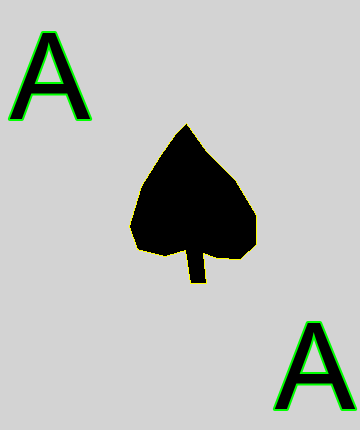

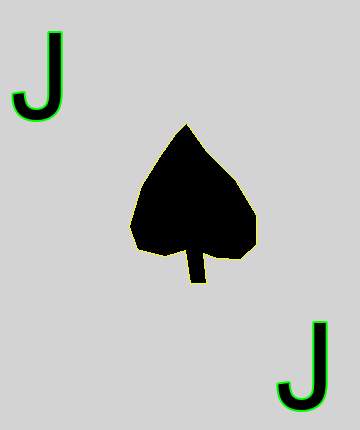

done
last_plays
0
player1
[1 of spades]
player2
[11 of spades]
0
0
0
exhausted
exhausted


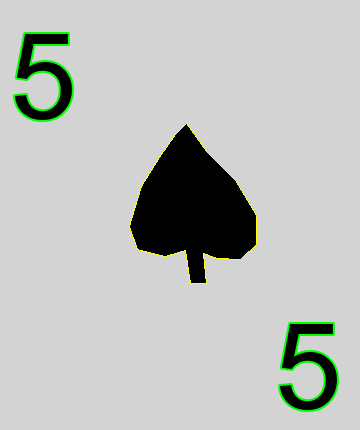

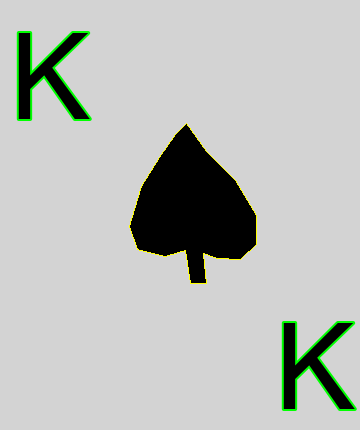

continuing


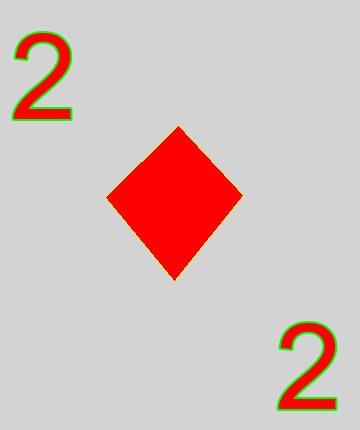

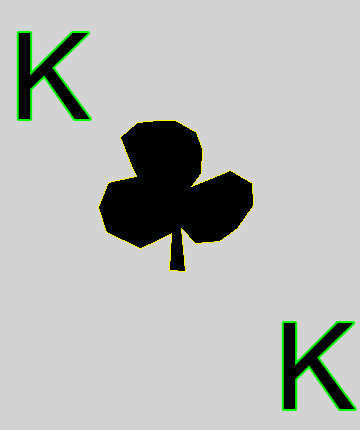

continuing


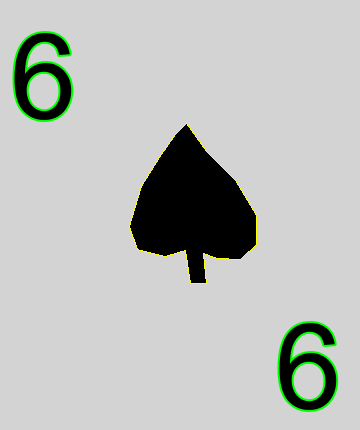

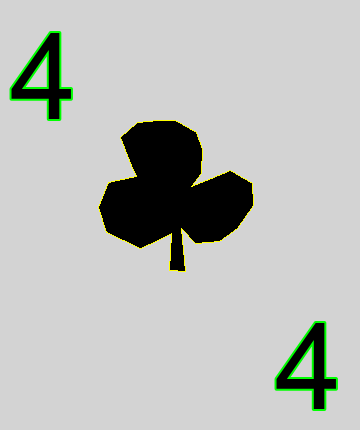

done
last_plays
1
player1
[1 of spades, 5 of spades, 2 of diamonds, 6 of spades]
player2
[11 of spades, 13 of spades, 13 of clubs, 4 of clubs]
6
4
6


In [30]:
init_round()
face_up(around)
face_up(around)
face_up(around)
init_round()
face_up(around)
face_up(around)
face_up(around)